In [228]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [229]:
fp = pd.read_csv('D:\download\MLF_GP2_EconCycle.csv')
df = pd.DataFrame (fp)
df = df.drop(['Date'],axis=1)

# EDA:

In [230]:
summary = df.describe()
print(summary)

        T1Y Index   T2Y Index   T3Y Index   T5Y Index   T7Y Index  T10Y Index  \
count  223.000000  223.000000  223.000000  223.000000  223.000000  223.000000   
mean     8.030717    8.410673    8.563587    8.808655    8.979776    9.073498   
std      3.158575    2.954431    2.820405    2.647742    2.542686    2.447525   
min      3.180000    3.840000    4.170000    4.710000    5.050000    5.330000   
25%      5.735000    6.180000    6.410000    6.695000    6.965000    7.175000   
50%      7.670000    8.000000    8.130000    8.330000    8.520000    8.610000   
75%      9.840000   10.075000   10.375000   10.525000   10.640000   10.685000   
max     16.720000   16.460000   16.220000   15.930000   15.650000   15.320000   

             CP1M        CP3M        CP6M    CP1M_T1Y    CP3M_T1Y    CP6M_T1Y  \
count  223.000000  223.000000  223.000000  223.000000  223.000000  223.000000   
mean     7.942197    7.936906    7.892780    0.981765    0.983524    0.982666   
std      3.405098    3.3293

In [231]:
nrow= len(df.index)
ncol= len(df.columns)
print("Number of Rows of Data =" , nrow, '\n')
print("Number of Columns of Data =" ,ncol)

Number of Rows of Data = 223 

Number of Columns of Data = 16


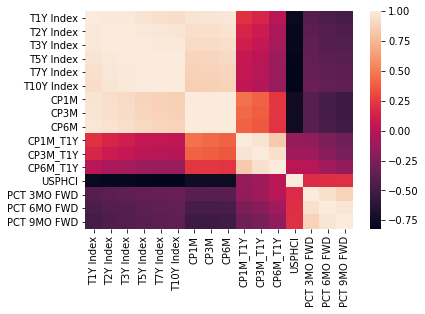

In [232]:
import seaborn as sns
cols = df.columns.values
cm = np.corrcoef(df.values.T)
hm = sns.heatmap(cm, cbar=True, xticklabels=cols, yticklabels=cols)

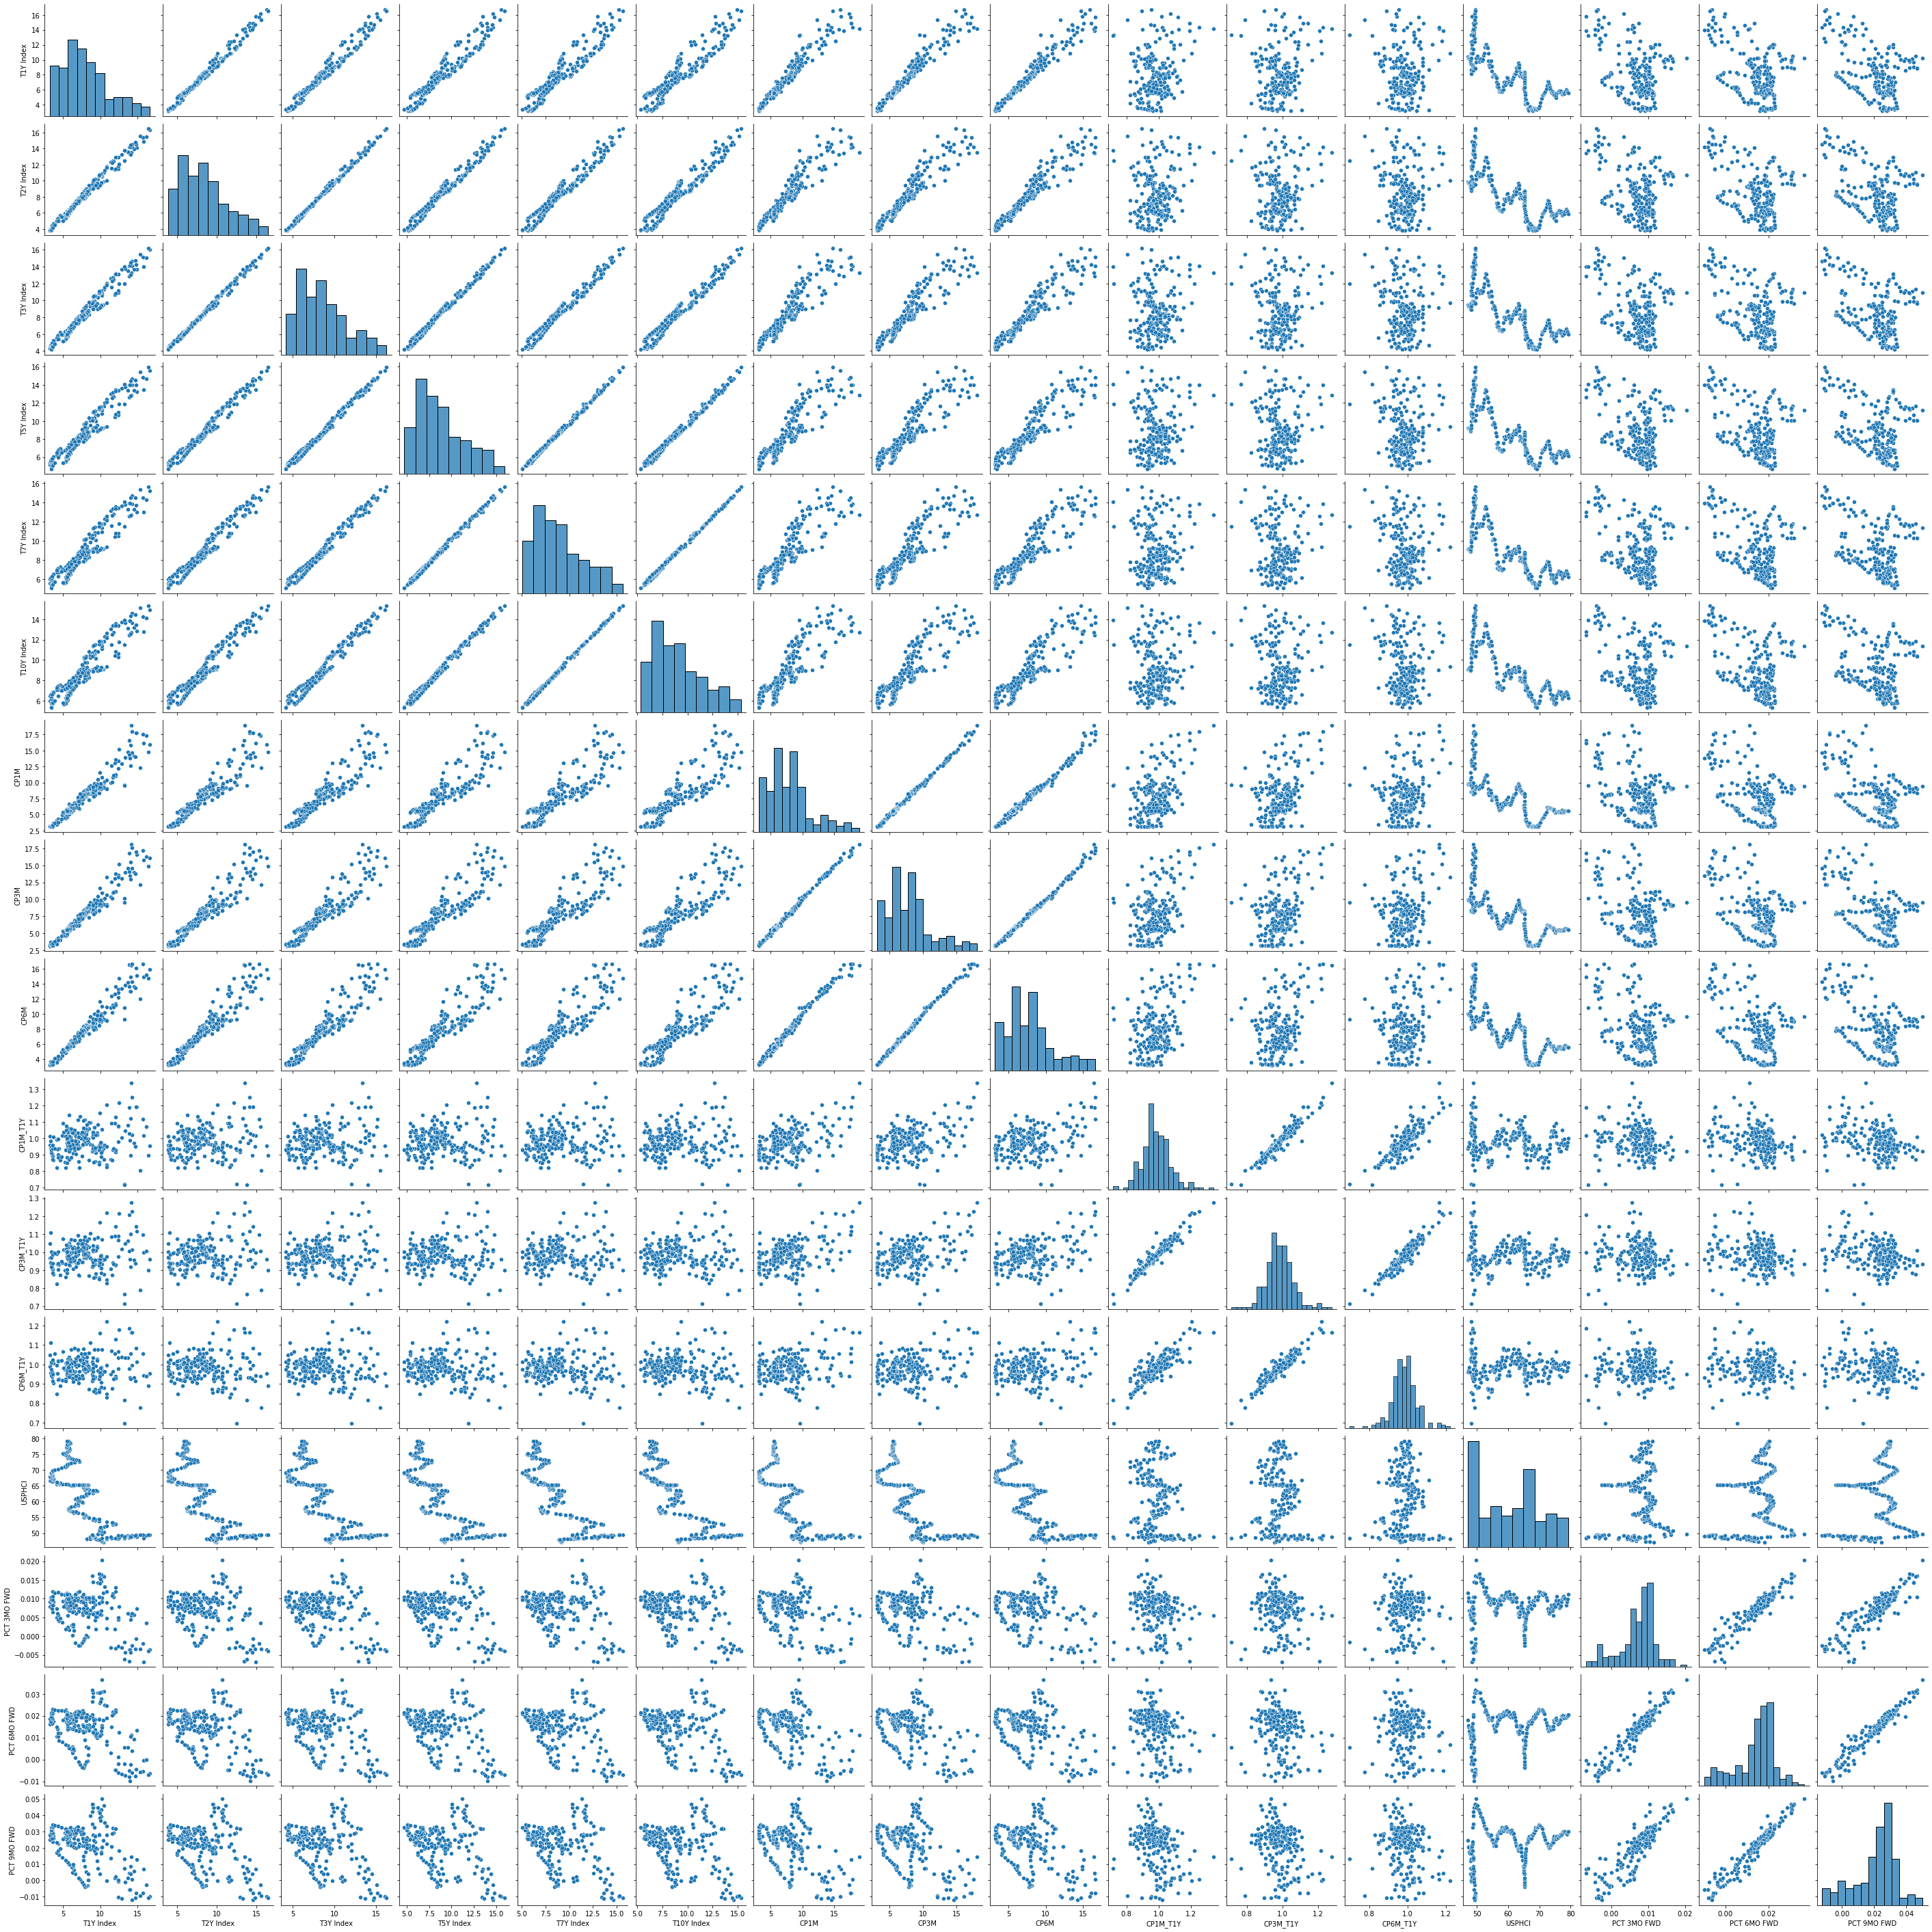

In [234]:
sns.pairplot(df)
plt.show()

# Preprocessing (pct 3mo fwd):

In [208]:
#PCT 3MO FWD
sc= StandardScaler()
X= df.iloc[:,0:12].values
X_std= sc.fit_transform(X)
y= df['PCT 3MO FWD'].values
y= y.reshape(-1,1)
y_std= sc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.15, random_state= 42)

# Feature Extraction:

When principal components is 12, explained variance ratio is  
 [6.91996019e-01 2.84220212e-01 1.36702684e-02 8.72058917e-03
 7.57580128e-04 3.67561823e-04 2.04064940e-04 3.37083016e-05
 1.37295098e-05 8.98158127e-06 6.07293859e-06 1.21182402e-06]


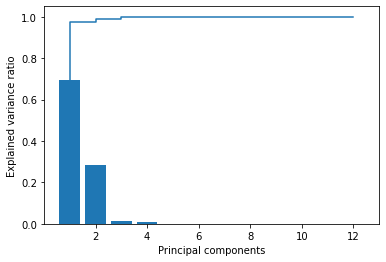

In [235]:
# PCA for PCT 3MO FWD
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from time import process_time
pca=PCA()
X_train_pca= pca.fit_transform(X_train)
X_test_pca= pca.fit_transform(X_test)
list_ratio= pca.explained_variance_ratio_
print("When principal components is 12, explained variance ratio is  \n", list_ratio)
plt.bar(range(1, 13), list_ratio)
plt.step(range(1, 13), np.cumsum(list_ratio))
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.show()

When principal components is 3, explained variance ratio is  
 [0.73816866 0.23796935 0.01392718]


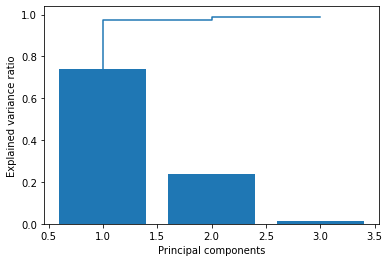

Sum of the principal components:  [0.73816866 0.97613801 0.99006519]


In [240]:
pca = PCA(n_components=3)
X_train_pca_new = pca.fit_transform(X_train)
X_test_pca_new = pca.transform(X_test)
list_ratio_new = pca.explained_variance_ratio_
print("When principal components is 3, explained variance ratio is  \n", list_ratio_new)
plt.bar(range(1, 4), list_ratio_new)
plt.step(range(1, 4), np.cumsum(list_ratio_new))
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.show()
print("Sum of the principal components: ",np.cumsum(list_ratio_new))

# Feature Selection:

In [241]:
#ridge
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(X_train,y_train)
y_train_pred= ridge.predict (X_train)
y_test_pred= ridge.predict(X_test) 
print ('Slope:',ridge.coef_)
print ('Intercept:',ridge.intercept_,'\n')

print("MSE train: ",mean_squared_error(y_train,y_train_pred))
print("MSE test: ",mean_squared_error(y_test,y_test_pred))

print("R2 train: ", r2_score(y_train,y_train_pred))
print("R2 test: ", r2_score(y_test,y_test_pred))

Slope: [[-0.62018756  0.11078952  0.29693336 -0.19147021  0.14622232  0.1473293
   0.2484388  -0.22668308 -0.29355337 -0.1284454  -0.0997598   0.34596463]]
Intercept: [-0.00581245] 

MSE train:  0.7895587011243228
MSE test:  0.8183446604298262
R2 train:  0.2183803768325041
R2 test:  0.1325944580630508


# Model Fitting and Evaluation:

In [243]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

reg = LinearRegression()
reg.fit(X_train_pca_new, y_train)
y_train_pred= reg.predict (X_train_pca_new)
y_test_pred = reg.predict (X_test_pca_new)
print ('Slope:',reg.coef_)
print ('Intercept:',reg.intercept_,'\n')

print("RMSE train: ",math.sqrt(mean_squared_error(y_train,y_train_pred)))
print("RMSE test: ",math.sqrt(mean_squared_error(y_test,y_test_pred)))

print("R2 train: ", r2_score(y_train,y_train_pred))
print("R2 test: ", r2_score(y_test,y_test_pred))

Slope: [[-0.13793549 -0.00796246  0.47166311]]
Intercept: [-0.00164223] 

RMSE train:  0.8947126299690807
RMSE test:  0.906644879178309
R2 train:  0.20753851088568398
R2 test:  0.12871474297027297


# Hyperparameter Tuning:

In [219]:
params_ridge = {'alpha':[0.5,0.7,0.9,1.0]}
grid = GridSearchCV(estimator=ridge, param_grid=params_ridge)
grid.fit(X_train,np.ravel(y_train))
print(grid.best_params_)

{'alpha': 1.0}


# Ensembling:

In [179]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf= RandomForestRegressor()
params_rf = {'n_estimators':[25,50,100,150,200]}
grid = GridSearchCV(estimator=rf, param_grid=params_rf)
grid.fit(X_train,np.ravel(y_train))
print(grid.best_params_)

{'n_estimators': 150}


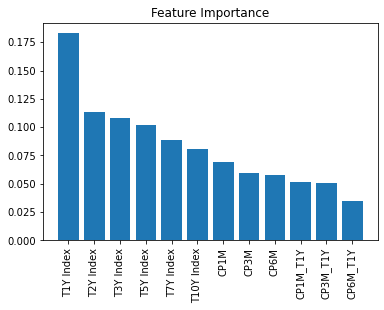

0.9338744096695764


In [226]:
rfr=RandomForestRegressor(n_estimators=150,random_state=1)
rfr.fit(X_train,np.ravel(y_train))
importances= rfr.feature_importances_
sorted_index= np.argsort(importances)[::-1]
x = range(len(importances))
plt.bar(x, importances[sorted_index],tick_label=df.columns[0:12])
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()
print(rfr.score(X_train,np.ravel(y_train)))

In [214]:
in_sample = cross_val_score(grid, X_train,np.ravel(y_train), cv=10)
print('In sample scores: ',in_sample,'\n')
print('In sample scores mean: ',np.mean(in_sample),'\n')
print('In sample scores standard deviation: ',np.std(in_sample),'\n')

In sample scores:  [ 0.33089055  0.33729452  0.50694087  0.51219375  0.53620365  0.6946014
 -0.14685764  0.44090123  0.56184298  0.32939835] 

In sample scores mean:  0.4103409661045282 

In sample scores standard deviation:  0.21654280632913198 



In [238]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
regr = AdaBoostRegressor()
params_regr = {'n_estimators':[25,50,100,150,200]}
grid = GridSearchCV(estimator=regr, param_grid=params_regr)
grid.fit(X_train,np.ravel(y_train))
print(grid.best_params_)

{'n_estimators': 25}


In [237]:
regr = AdaBoostRegressor(n_estimators=25)
regr.fit(X_train, np.ravel(y_train))
regr.score(X_train,np.ravel(y_train))

0.7143949543799757

In [239]:
in_sample = cross_val_score(regr, X_train,np.ravel(y_train), cv=10)
print('In sample scores: ',in_sample,'\n')
print('In sample scores mean: ',np.mean(in_sample),'\n')
print('In sample scores standard deviation: ',np.std(in_sample),'\n')

In sample scores:  [-0.28011716  0.17966209  0.51480373  0.35745008  0.38320528  0.18387011
 -0.11613298  0.38639879  0.19597257  0.13423074] 

In sample scores mean:  0.19393432467253136 

In sample scores standard deviation:  0.22963031978112233 

